In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
from sklearn.linear_model import LinearRegression

In [2]:
header = pd.read_excel('5kW流化床燃燒爐.xlsx', sheet_name='穩定燃燒').iloc[:1,:]

In [3]:
header

,time (s),預熱燃料(LPG，slpm/min),空氣流量(splm/min),進料量(g/hr),進料量(kW),溫度1床材,溫度2爐下,溫度3爐中下,溫度4爐中上,溫度5爐上,O2 %,CO2 %,CO_6% O2\n(ppm),NOx_6% O2\n(ppm),SO2\n(ppm)
0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y1,Y2,Y3,Y4,Y5


In [4]:
data = pd.read_excel('5kW流化床燃燒爐.xlsx', sheet_name='穩定燃燒', skiprows=1)

In [5]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y1,Y2,Y3,Y4,Y5
0,0.0,0,77,906,5,922.5,869.6,763.0,646.7,517.7,6.95,15.4,140.925267,253.024911,18
1,2.0,0,77,906,5,922.6,869.6,763.0,646.7,517.7,6.95,15.4,140.925267,253.024911,18
2,4.0,0,77,906,5,922.6,869.6,763.0,646.7,517.7,6.97,15.4,141.126158,253.385602,18
3,6.0,0,77,906,5,922.3,869.6,763.0,646.7,517.7,7.01,15.4,141.529664,255.182273,18
4,8.0,0,77,906,5,921.8,871.1,765.5,646.7,517.7,7.11,15.4,140.388769,257.019438,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,5392.0,0,77,906,5,912.0,856.0,752.2,643.8,522.8,7.65,13.9,110.112360,271.910112,28
2697,5394.0,0,77,906,5,912.3,856.0,752.2,641.6,522.8,7.99,14.0,112.990008,279.016141,28
2698,5396.0,0,77,906,5,912.2,856.0,752.2,641.6,522.3,8.07,14.0,113.689095,280.742459,28
2699,5398.0,0,77,906,5,911.9,856.0,756.2,641.6,522.3,8.16,14.0,114.485981,282.710280,28


In [6]:
## 測試期間
test_period = 120

## 移動窗格大小
moving_window_size = 60

train_data = data.iloc[:-test_period,:]
test_data = data.iloc[-test_period-moving_window_size:,:]

In [7]:
print('Training X1 : ', train_data['X1'].iloc[0], "~", train_data['X1'].iloc[-1])
print('Testing  X1 : ', test_data['X1'].iloc[moving_window_size-1], "~", test_data['X1'].iloc[-1])

Training X1 :  0.0 ~ 5160.0
Testing  X1 :  5160.0 ~ 5400.0


In [8]:
x_column_list = [
    "X1",
    "X2",
    "X3",
    "X4",
    "X5",
    "X6",
    "X7",
    "X8",
    "X9",
    "X10",
]
y_column_list = [
    "Y1",
    "Y2",
    "Y3",
    "Y4",
    "Y5",
]

train_y = train_data[y_column_list]
train_x = train_data[x_column_list]

test_y  = test_data[y_column_list]
test_x  = test_data[x_column_list]

In [9]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler()
x_scaler.fit(train_x) ## 注意這邊是用訓練資料fit

y_scaler = StandardScaler()
y_scaler.fit(train_y) ## 注意這邊是用訓練資料fit


train_x_std = x_scaler.transform(train_x)
test_x_std = x_scaler.transform(test_x)

train_y_std = y_scaler.transform(train_y)
test_y_std = y_scaler.transform(test_y)

In [10]:
# 來理解一下移動窗格
for i in range(moving_window_size, train_x.shape[0]):
    now_x_date = train_x.index[i - moving_window_size: i]
    now_y_date = train_x.index.values[i]
    
    print('train x idx : ', i - moving_window_size, '~', i, "(不含第%d筆)"%i)
    print('train x date : ', now_x_date[0], '~', now_x_date[-1])
    print('train y idx  : ', i )
    print('train y date  : ', now_y_date )
    print('-------------------------------')

train x idx :  0 ~ 60 (不含第60筆)
train x date :  0 ~ 59
train y idx  :  60
train y date  :  60
-------------------------------
train x idx :  1 ~ 61 (不含第61筆)
train x date :  1 ~ 60
train y idx  :  61
train y date  :  61
-------------------------------
train x idx :  2 ~ 62 (不含第62筆)
train x date :  2 ~ 61
train y idx  :  62
train y date  :  62
-------------------------------
train x idx :  3 ~ 63 (不含第63筆)
train x date :  3 ~ 62
train y idx  :  63
train y date  :  63
-------------------------------
train x idx :  4 ~ 64 (不含第64筆)
train x date :  4 ~ 63
train y idx  :  64
train y date  :  64
-------------------------------
train x idx :  5 ~ 65 (不含第65筆)
train x date :  5 ~ 64
train y idx  :  65
train y date  :  65
-------------------------------
train x idx :  6 ~ 66 (不含第66筆)
train x date :  6 ~ 65
train y idx  :  66
train y date  :  66
-------------------------------
train x idx :  7 ~ 67 (不含第67筆)
train x date :  7 ~ 66
train y idx  :  67
train y date  :  67
-------------------------------


train x idx :  101 ~ 161 (不含第161筆)
train x date :  101 ~ 160
train y idx  :  161
train y date  :  161
-------------------------------
train x idx :  102 ~ 162 (不含第162筆)
train x date :  102 ~ 161
train y idx  :  162
train y date  :  162
-------------------------------
train x idx :  103 ~ 163 (不含第163筆)
train x date :  103 ~ 162
train y idx  :  163
train y date  :  163
-------------------------------
train x idx :  104 ~ 164 (不含第164筆)
train x date :  104 ~ 163
train y idx  :  164
train y date  :  164
-------------------------------
train x idx :  105 ~ 165 (不含第165筆)
train x date :  105 ~ 164
train y idx  :  165
train y date  :  165
-------------------------------
train x idx :  106 ~ 166 (不含第166筆)
train x date :  106 ~ 165
train y idx  :  166
train y date  :  166
-------------------------------
train x idx :  107 ~ 167 (不含第167筆)
train x date :  107 ~ 166
train y idx  :  167
train y date  :  167
-------------------------------
train x idx :  108 ~ 168 (不含第168筆)
train x date :  108 ~ 167
t

train x idx :  208 ~ 268 (不含第268筆)
train x date :  208 ~ 267
train y idx  :  268
train y date  :  268
-------------------------------
train x idx :  209 ~ 269 (不含第269筆)
train x date :  209 ~ 268
train y idx  :  269
train y date  :  269
-------------------------------
train x idx :  210 ~ 270 (不含第270筆)
train x date :  210 ~ 269
train y idx  :  270
train y date  :  270
-------------------------------
train x idx :  211 ~ 271 (不含第271筆)
train x date :  211 ~ 270
train y idx  :  271
train y date  :  271
-------------------------------
train x idx :  212 ~ 272 (不含第272筆)
train x date :  212 ~ 271
train y idx  :  272
train y date  :  272
-------------------------------
train x idx :  213 ~ 273 (不含第273筆)
train x date :  213 ~ 272
train y idx  :  273
train y date  :  273
-------------------------------
train x idx :  214 ~ 274 (不含第274筆)
train x date :  214 ~ 273
train y idx  :  274
train y date  :  274
-------------------------------
train x idx :  215 ~ 275 (不含第275筆)
train x date :  215 ~ 274
t

train x idx :  315 ~ 375 (不含第375筆)
train x date :  315 ~ 374
train y idx  :  375
train y date  :  375
-------------------------------
train x idx :  316 ~ 376 (不含第376筆)
train x date :  316 ~ 375
train y idx  :  376
train y date  :  376
-------------------------------
train x idx :  317 ~ 377 (不含第377筆)
train x date :  317 ~ 376
train y idx  :  377
train y date  :  377
-------------------------------
train x idx :  318 ~ 378 (不含第378筆)
train x date :  318 ~ 377
train y idx  :  378
train y date  :  378
-------------------------------
train x idx :  319 ~ 379 (不含第379筆)
train x date :  319 ~ 378
train y idx  :  379
train y date  :  379
-------------------------------
train x idx :  320 ~ 380 (不含第380筆)
train x date :  320 ~ 379
train y idx  :  380
train y date  :  380
-------------------------------
train x idx :  321 ~ 381 (不含第381筆)
train x date :  321 ~ 380
train y idx  :  381
train y date  :  381
-------------------------------
train x idx :  322 ~ 382 (不含第382筆)
train x date :  322 ~ 381
t

train x idx :  422 ~ 482 (不含第482筆)
train x date :  422 ~ 481
train y idx  :  482
train y date  :  482
-------------------------------
train x idx :  423 ~ 483 (不含第483筆)
train x date :  423 ~ 482
train y idx  :  483
train y date  :  483
-------------------------------
train x idx :  424 ~ 484 (不含第484筆)
train x date :  424 ~ 483
train y idx  :  484
train y date  :  484
-------------------------------
train x idx :  425 ~ 485 (不含第485筆)
train x date :  425 ~ 484
train y idx  :  485
train y date  :  485
-------------------------------
train x idx :  426 ~ 486 (不含第486筆)
train x date :  426 ~ 485
train y idx  :  486
train y date  :  486
-------------------------------
train x idx :  427 ~ 487 (不含第487筆)
train x date :  427 ~ 486
train y idx  :  487
train y date  :  487
-------------------------------
train x idx :  428 ~ 488 (不含第488筆)
train x date :  428 ~ 487
train y idx  :  488
train y date  :  488
-------------------------------
train x idx :  429 ~ 489 (不含第489筆)
train x date :  429 ~ 488
t

train x idx :  529 ~ 589 (不含第589筆)
train x date :  529 ~ 588
train y idx  :  589
train y date  :  589
-------------------------------
train x idx :  530 ~ 590 (不含第590筆)
train x date :  530 ~ 589
train y idx  :  590
train y date  :  590
-------------------------------
train x idx :  531 ~ 591 (不含第591筆)
train x date :  531 ~ 590
train y idx  :  591
train y date  :  591
-------------------------------
train x idx :  532 ~ 592 (不含第592筆)
train x date :  532 ~ 591
train y idx  :  592
train y date  :  592
-------------------------------
train x idx :  533 ~ 593 (不含第593筆)
train x date :  533 ~ 592
train y idx  :  593
train y date  :  593
-------------------------------
train x idx :  534 ~ 594 (不含第594筆)
train x date :  534 ~ 593
train y idx  :  594
train y date  :  594
-------------------------------
train x idx :  535 ~ 595 (不含第595筆)
train x date :  535 ~ 594
train y idx  :  595
train y date  :  595
-------------------------------
train x idx :  536 ~ 596 (不含第596筆)
train x date :  536 ~ 595
t

train x date :  636 ~ 695
train y idx  :  696
train y date  :  696
-------------------------------
train x idx :  637 ~ 697 (不含第697筆)
train x date :  637 ~ 696
train y idx  :  697
train y date  :  697
-------------------------------
train x idx :  638 ~ 698 (不含第698筆)
train x date :  638 ~ 697
train y idx  :  698
train y date  :  698
-------------------------------
train x idx :  639 ~ 699 (不含第699筆)
train x date :  639 ~ 698
train y idx  :  699
train y date  :  699
-------------------------------
train x idx :  640 ~ 700 (不含第700筆)
train x date :  640 ~ 699
train y idx  :  700
train y date  :  700
-------------------------------
train x idx :  641 ~ 701 (不含第701筆)
train x date :  641 ~ 700
train y idx  :  701
train y date  :  701
-------------------------------
train x idx :  642 ~ 702 (不含第702筆)
train x date :  642 ~ 701
train y idx  :  702
train y date  :  702
-------------------------------
train x idx :  643 ~ 703 (不含第703筆)
train x date :  643 ~ 702
train y idx  :  703
train y date  : 

train y date  :  805
-------------------------------
train x idx :  746 ~ 806 (不含第806筆)
train x date :  746 ~ 805
train y idx  :  806
train y date  :  806
-------------------------------
train x idx :  747 ~ 807 (不含第807筆)
train x date :  747 ~ 806
train y idx  :  807
train y date  :  807
-------------------------------
train x idx :  748 ~ 808 (不含第808筆)
train x date :  748 ~ 807
train y idx  :  808
train y date  :  808
-------------------------------
train x idx :  749 ~ 809 (不含第809筆)
train x date :  749 ~ 808
train y idx  :  809
train y date  :  809
-------------------------------
train x idx :  750 ~ 810 (不含第810筆)
train x date :  750 ~ 809
train y idx  :  810
train y date  :  810
-------------------------------
train x idx :  751 ~ 811 (不含第811筆)
train x date :  751 ~ 810
train y idx  :  811
train y date  :  811
-------------------------------
train x idx :  752 ~ 812 (不含第812筆)
train x date :  752 ~ 811
train y idx  :  812
train y date  :  812
-------------------------------
train x i

train x date :  850 ~ 909
train y idx  :  910
train y date  :  910
-------------------------------
train x idx :  851 ~ 911 (不含第911筆)
train x date :  851 ~ 910
train y idx  :  911
train y date  :  911
-------------------------------
train x idx :  852 ~ 912 (不含第912筆)
train x date :  852 ~ 911
train y idx  :  912
train y date  :  912
-------------------------------
train x idx :  853 ~ 913 (不含第913筆)
train x date :  853 ~ 912
train y idx  :  913
train y date  :  913
-------------------------------
train x idx :  854 ~ 914 (不含第914筆)
train x date :  854 ~ 913
train y idx  :  914
train y date  :  914
-------------------------------
train x idx :  855 ~ 915 (不含第915筆)
train x date :  855 ~ 914
train y idx  :  915
train y date  :  915
-------------------------------
train x idx :  856 ~ 916 (不含第916筆)
train x date :  856 ~ 915
train y idx  :  916
train y date  :  916
-------------------------------
train x idx :  857 ~ 917 (不含第917筆)
train x date :  857 ~ 916
train y idx  :  917
train y date  : 

train y idx  :  1017
train y date  :  1017
-------------------------------
train x idx :  958 ~ 1018 (不含第1018筆)
train x date :  958 ~ 1017
train y idx  :  1018
train y date  :  1018
-------------------------------
train x idx :  959 ~ 1019 (不含第1019筆)
train x date :  959 ~ 1018
train y idx  :  1019
train y date  :  1019
-------------------------------
train x idx :  960 ~ 1020 (不含第1020筆)
train x date :  960 ~ 1019
train y idx  :  1020
train y date  :  1020
-------------------------------
train x idx :  961 ~ 1021 (不含第1021筆)
train x date :  961 ~ 1020
train y idx  :  1021
train y date  :  1021
-------------------------------
train x idx :  962 ~ 1022 (不含第1022筆)
train x date :  962 ~ 1021
train y idx  :  1022
train y date  :  1022
-------------------------------
train x idx :  963 ~ 1023 (不含第1023筆)
train x date :  963 ~ 1022
train y idx  :  1023
train y date  :  1023
-------------------------------
train x idx :  964 ~ 1024 (不含第1024筆)
train x date :  964 ~ 1023
train y idx  :  1024
train 

train x date :  1072 ~ 1131
train y idx  :  1132
train y date  :  1132
-------------------------------
train x idx :  1073 ~ 1133 (不含第1133筆)
train x date :  1073 ~ 1132
train y idx  :  1133
train y date  :  1133
-------------------------------
train x idx :  1074 ~ 1134 (不含第1134筆)
train x date :  1074 ~ 1133
train y idx  :  1134
train y date  :  1134
-------------------------------
train x idx :  1075 ~ 1135 (不含第1135筆)
train x date :  1075 ~ 1134
train y idx  :  1135
train y date  :  1135
-------------------------------
train x idx :  1076 ~ 1136 (不含第1136筆)
train x date :  1076 ~ 1135
train y idx  :  1136
train y date  :  1136
-------------------------------
train x idx :  1077 ~ 1137 (不含第1137筆)
train x date :  1077 ~ 1136
train y idx  :  1137
train y date  :  1137
-------------------------------
train x idx :  1078 ~ 1138 (不含第1138筆)
train x date :  1078 ~ 1137
train y idx  :  1138
train y date  :  1138
-------------------------------
train x idx :  1079 ~ 1139 (不含第1139筆)
train x date 

train x idx :  1179 ~ 1239 (不含第1239筆)
train x date :  1179 ~ 1238
train y idx  :  1239
train y date  :  1239
-------------------------------
train x idx :  1180 ~ 1240 (不含第1240筆)
train x date :  1180 ~ 1239
train y idx  :  1240
train y date  :  1240
-------------------------------
train x idx :  1181 ~ 1241 (不含第1241筆)
train x date :  1181 ~ 1240
train y idx  :  1241
train y date  :  1241
-------------------------------
train x idx :  1182 ~ 1242 (不含第1242筆)
train x date :  1182 ~ 1241
train y idx  :  1242
train y date  :  1242
-------------------------------
train x idx :  1183 ~ 1243 (不含第1243筆)
train x date :  1183 ~ 1242
train y idx  :  1243
train y date  :  1243
-------------------------------
train x idx :  1184 ~ 1244 (不含第1244筆)
train x date :  1184 ~ 1243
train y idx  :  1244
train y date  :  1244
-------------------------------
train x idx :  1185 ~ 1245 (不含第1245筆)
train x date :  1185 ~ 1244
train y idx  :  1245
train y date  :  1245
-------------------------------
train x idx :

train x idx :  1287 ~ 1347 (不含第1347筆)
train x date :  1287 ~ 1346
train y idx  :  1347
train y date  :  1347
-------------------------------
train x idx :  1288 ~ 1348 (不含第1348筆)
train x date :  1288 ~ 1347
train y idx  :  1348
train y date  :  1348
-------------------------------
train x idx :  1289 ~ 1349 (不含第1349筆)
train x date :  1289 ~ 1348
train y idx  :  1349
train y date  :  1349
-------------------------------
train x idx :  1290 ~ 1350 (不含第1350筆)
train x date :  1290 ~ 1349
train y idx  :  1350
train y date  :  1350
-------------------------------
train x idx :  1291 ~ 1351 (不含第1351筆)
train x date :  1291 ~ 1350
train y idx  :  1351
train y date  :  1351
-------------------------------
train x idx :  1292 ~ 1352 (不含第1352筆)
train x date :  1292 ~ 1351
train y idx  :  1352
train y date  :  1352
-------------------------------
train x idx :  1293 ~ 1353 (不含第1353筆)
train x date :  1293 ~ 1352
train y idx  :  1353
train y date  :  1353
-------------------------------
train x idx :

train x idx :  1405 ~ 1465 (不含第1465筆)
train x date :  1405 ~ 1464
train y idx  :  1465
train y date  :  1465
-------------------------------
train x idx :  1406 ~ 1466 (不含第1466筆)
train x date :  1406 ~ 1465
train y idx  :  1466
train y date  :  1466
-------------------------------
train x idx :  1407 ~ 1467 (不含第1467筆)
train x date :  1407 ~ 1466
train y idx  :  1467
train y date  :  1467
-------------------------------
train x idx :  1408 ~ 1468 (不含第1468筆)
train x date :  1408 ~ 1467
train y idx  :  1468
train y date  :  1468
-------------------------------
train x idx :  1409 ~ 1469 (不含第1469筆)
train x date :  1409 ~ 1468
train y idx  :  1469
train y date  :  1469
-------------------------------
train x idx :  1410 ~ 1470 (不含第1470筆)
train x date :  1410 ~ 1469
train y idx  :  1470
train y date  :  1470
-------------------------------
train x idx :  1411 ~ 1471 (不含第1471筆)
train x date :  1411 ~ 1470
train y idx  :  1471
train y date  :  1471
-------------------------------
train x idx :

train x idx :  1514 ~ 1574 (不含第1574筆)
train x date :  1514 ~ 1573
train y idx  :  1574
train y date  :  1574
-------------------------------
train x idx :  1515 ~ 1575 (不含第1575筆)
train x date :  1515 ~ 1574
train y idx  :  1575
train y date  :  1575
-------------------------------
train x idx :  1516 ~ 1576 (不含第1576筆)
train x date :  1516 ~ 1575
train y idx  :  1576
train y date  :  1576
-------------------------------
train x idx :  1517 ~ 1577 (不含第1577筆)
train x date :  1517 ~ 1576
train y idx  :  1577
train y date  :  1577
-------------------------------
train x idx :  1518 ~ 1578 (不含第1578筆)
train x date :  1518 ~ 1577
train y idx  :  1578
train y date  :  1578
-------------------------------
train x idx :  1519 ~ 1579 (不含第1579筆)
train x date :  1519 ~ 1578
train y idx  :  1579
train y date  :  1579
-------------------------------
train x idx :  1520 ~ 1580 (不含第1580筆)
train x date :  1520 ~ 1579
train y idx  :  1580
train y date  :  1580
-------------------------------
train x idx :

train x idx :  1625 ~ 1685 (不含第1685筆)
train x date :  1625 ~ 1684
train y idx  :  1685
train y date  :  1685
-------------------------------
train x idx :  1626 ~ 1686 (不含第1686筆)
train x date :  1626 ~ 1685
train y idx  :  1686
train y date  :  1686
-------------------------------
train x idx :  1627 ~ 1687 (不含第1687筆)
train x date :  1627 ~ 1686
train y idx  :  1687
train y date  :  1687
-------------------------------
train x idx :  1628 ~ 1688 (不含第1688筆)
train x date :  1628 ~ 1687
train y idx  :  1688
train y date  :  1688
-------------------------------
train x idx :  1629 ~ 1689 (不含第1689筆)
train x date :  1629 ~ 1688
train y idx  :  1689
train y date  :  1689
-------------------------------
train x idx :  1630 ~ 1690 (不含第1690筆)
train x date :  1630 ~ 1689
train y idx  :  1690
train y date  :  1690
-------------------------------
train x idx :  1631 ~ 1691 (不含第1691筆)
train x date :  1631 ~ 1690
train y idx  :  1691
train y date  :  1691
-------------------------------
train x idx :

train y date  :  1802
-------------------------------
train x idx :  1743 ~ 1803 (不含第1803筆)
train x date :  1743 ~ 1802
train y idx  :  1803
train y date  :  1803
-------------------------------
train x idx :  1744 ~ 1804 (不含第1804筆)
train x date :  1744 ~ 1803
train y idx  :  1804
train y date  :  1804
-------------------------------
train x idx :  1745 ~ 1805 (不含第1805筆)
train x date :  1745 ~ 1804
train y idx  :  1805
train y date  :  1805
-------------------------------
train x idx :  1746 ~ 1806 (不含第1806筆)
train x date :  1746 ~ 1805
train y idx  :  1806
train y date  :  1806
-------------------------------
train x idx :  1747 ~ 1807 (不含第1807筆)
train x date :  1747 ~ 1806
train y idx  :  1807
train y date  :  1807
-------------------------------
train x idx :  1748 ~ 1808 (不含第1808筆)
train x date :  1748 ~ 1807
train y idx  :  1808
train y date  :  1808
-------------------------------
train x idx :  1749 ~ 1809 (不含第1809筆)
train x date :  1749 ~ 1808
train y idx  :  1809
train y date 

train y idx  :  1911
train y date  :  1911
-------------------------------
train x idx :  1852 ~ 1912 (不含第1912筆)
train x date :  1852 ~ 1911
train y idx  :  1912
train y date  :  1912
-------------------------------
train x idx :  1853 ~ 1913 (不含第1913筆)
train x date :  1853 ~ 1912
train y idx  :  1913
train y date  :  1913
-------------------------------
train x idx :  1854 ~ 1914 (不含第1914筆)
train x date :  1854 ~ 1913
train y idx  :  1914
train y date  :  1914
-------------------------------
train x idx :  1855 ~ 1915 (不含第1915筆)
train x date :  1855 ~ 1914
train y idx  :  1915
train y date  :  1915
-------------------------------
train x idx :  1856 ~ 1916 (不含第1916筆)
train x date :  1856 ~ 1915
train y idx  :  1916
train y date  :  1916
-------------------------------
train x idx :  1857 ~ 1917 (不含第1917筆)
train x date :  1857 ~ 1916
train y idx  :  1917
train y date  :  1917
-------------------------------
train x idx :  1858 ~ 1918 (不含第1918筆)
train x date :  1858 ~ 1917
train y idx  

train x idx :  1957 ~ 2017 (不含第2017筆)
train x date :  1957 ~ 2016
train y idx  :  2017
train y date  :  2017
-------------------------------
train x idx :  1958 ~ 2018 (不含第2018筆)
train x date :  1958 ~ 2017
train y idx  :  2018
train y date  :  2018
-------------------------------
train x idx :  1959 ~ 2019 (不含第2019筆)
train x date :  1959 ~ 2018
train y idx  :  2019
train y date  :  2019
-------------------------------
train x idx :  1960 ~ 2020 (不含第2020筆)
train x date :  1960 ~ 2019
train y idx  :  2020
train y date  :  2020
-------------------------------
train x idx :  1961 ~ 2021 (不含第2021筆)
train x date :  1961 ~ 2020
train y idx  :  2021
train y date  :  2021
-------------------------------
train x idx :  1962 ~ 2022 (不含第2022筆)
train x date :  1962 ~ 2021
train y idx  :  2022
train y date  :  2022
-------------------------------
train x idx :  1963 ~ 2023 (不含第2023筆)
train x date :  1963 ~ 2022
train y idx  :  2023
train y date  :  2023
-------------------------------
train x idx :

train x idx :  2071 ~ 2131 (不含第2131筆)
train x date :  2071 ~ 2130
train y idx  :  2131
train y date  :  2131
-------------------------------
train x idx :  2072 ~ 2132 (不含第2132筆)
train x date :  2072 ~ 2131
train y idx  :  2132
train y date  :  2132
-------------------------------
train x idx :  2073 ~ 2133 (不含第2133筆)
train x date :  2073 ~ 2132
train y idx  :  2133
train y date  :  2133
-------------------------------
train x idx :  2074 ~ 2134 (不含第2134筆)
train x date :  2074 ~ 2133
train y idx  :  2134
train y date  :  2134
-------------------------------
train x idx :  2075 ~ 2135 (不含第2135筆)
train x date :  2075 ~ 2134
train y idx  :  2135
train y date  :  2135
-------------------------------
train x idx :  2076 ~ 2136 (不含第2136筆)
train x date :  2076 ~ 2135
train y idx  :  2136
train y date  :  2136
-------------------------------
train x idx :  2077 ~ 2137 (不含第2137筆)
train x date :  2077 ~ 2136
train y idx  :  2137
train y date  :  2137
-------------------------------
train x idx :

train x date :  2181 ~ 2240
train y idx  :  2241
train y date  :  2241
-------------------------------
train x idx :  2182 ~ 2242 (不含第2242筆)
train x date :  2182 ~ 2241
train y idx  :  2242
train y date  :  2242
-------------------------------
train x idx :  2183 ~ 2243 (不含第2243筆)
train x date :  2183 ~ 2242
train y idx  :  2243
train y date  :  2243
-------------------------------
train x idx :  2184 ~ 2244 (不含第2244筆)
train x date :  2184 ~ 2243
train y idx  :  2244
train y date  :  2244
-------------------------------
train x idx :  2185 ~ 2245 (不含第2245筆)
train x date :  2185 ~ 2244
train y idx  :  2245
train y date  :  2245
-------------------------------
train x idx :  2186 ~ 2246 (不含第2246筆)
train x date :  2186 ~ 2245
train y idx  :  2246
train y date  :  2246
-------------------------------
train x idx :  2187 ~ 2247 (不含第2247筆)
train x date :  2187 ~ 2246
train y idx  :  2247
train y date  :  2247
-------------------------------
train x idx :  2188 ~ 2248 (不含第2248筆)
train x date 

train y date  :  2350
-------------------------------
train x idx :  2291 ~ 2351 (不含第2351筆)
train x date :  2291 ~ 2350
train y idx  :  2351
train y date  :  2351
-------------------------------
train x idx :  2292 ~ 2352 (不含第2352筆)
train x date :  2292 ~ 2351
train y idx  :  2352
train y date  :  2352
-------------------------------
train x idx :  2293 ~ 2353 (不含第2353筆)
train x date :  2293 ~ 2352
train y idx  :  2353
train y date  :  2353
-------------------------------
train x idx :  2294 ~ 2354 (不含第2354筆)
train x date :  2294 ~ 2353
train y idx  :  2354
train y date  :  2354
-------------------------------
train x idx :  2295 ~ 2355 (不含第2355筆)
train x date :  2295 ~ 2354
train y idx  :  2355
train y date  :  2355
-------------------------------
train x idx :  2296 ~ 2356 (不含第2356筆)
train x date :  2296 ~ 2355
train y idx  :  2356
train y date  :  2356
-------------------------------
train x idx :  2297 ~ 2357 (不含第2357筆)
train x date :  2297 ~ 2356
train y idx  :  2357
train y date 

train x date :  2404 ~ 2463
train y idx  :  2464
train y date  :  2464
-------------------------------
train x idx :  2405 ~ 2465 (不含第2465筆)
train x date :  2405 ~ 2464
train y idx  :  2465
train y date  :  2465
-------------------------------
train x idx :  2406 ~ 2466 (不含第2466筆)
train x date :  2406 ~ 2465
train y idx  :  2466
train y date  :  2466
-------------------------------
train x idx :  2407 ~ 2467 (不含第2467筆)
train x date :  2407 ~ 2466
train y idx  :  2467
train y date  :  2467
-------------------------------
train x idx :  2408 ~ 2468 (不含第2468筆)
train x date :  2408 ~ 2467
train y idx  :  2468
train y date  :  2468
-------------------------------
train x idx :  2409 ~ 2469 (不含第2469筆)
train x date :  2409 ~ 2468
train y idx  :  2469
train y date  :  2469
-------------------------------
train x idx :  2410 ~ 2470 (不含第2470筆)
train x date :  2410 ~ 2469
train y idx  :  2470
train y date  :  2470
-------------------------------
train x idx :  2411 ~ 2471 (不含第2471筆)
train x date 

train x date :  2516 ~ 2575
train y idx  :  2576
train y date  :  2576
-------------------------------
train x idx :  2517 ~ 2577 (不含第2577筆)
train x date :  2517 ~ 2576
train y idx  :  2577
train y date  :  2577
-------------------------------
train x idx :  2518 ~ 2578 (不含第2578筆)
train x date :  2518 ~ 2577
train y idx  :  2578
train y date  :  2578
-------------------------------
train x idx :  2519 ~ 2579 (不含第2579筆)
train x date :  2519 ~ 2578
train y idx  :  2579
train y date  :  2579
-------------------------------
train x idx :  2520 ~ 2580 (不含第2580筆)
train x date :  2520 ~ 2579
train y idx  :  2580
train y date  :  2580
-------------------------------


In [11]:
train_y_std.shape

(2581, 5)

In [12]:
def makeMovingWindowData(x, y, moving_window_size):
    """
    提供 x, y, moving_window_size
    
    會回傳 移動窗格整理過後的 x, y
    return => x_window, y_window
    """
    x_window = [] 
    y_window = []  
    for i in range(moving_window_size, x.shape[0]):
        x_window.append(x[i - moving_window_size: i])
        y_window.append(y[i])
    x_window = np.array(x_window)
    y_window = np.array(y_window)

    return x_window, y_window

In [13]:
train_x_window , train_y_window = makeMovingWindowData(train_x_std, train_y_std, moving_window_size)
test_x_window , test_y_window = makeMovingWindowData(test_x_std, test_y_std, moving_window_size)
test_x_date_window , test_y_date_window = makeMovingWindowData(test_x.index, test_y.index, moving_window_size)

In [14]:
train_x_window.shape

(2521, 60, 10)

In [15]:
train_x_len, train_window_size, train_freature_count = train_x_window.shape

print('訓練資料長度 : ', train_x_len )
print('移動窗格大小 : ', train_window_size)
print('特徵長度    : ', train_freature_count)

訓練資料長度 :  2521
移動窗格大小 :  60
特徵長度    :  10


In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.losses import MeanSquaredError

model = Sequential()
# 加入輸入層 LSTM 
model.add(LSTM(
    units = 100, 
    return_sequences = True, 
    input_shape = (train_window_size, train_freature_count),
    activation='relu'))
# 加入Dropout層 
model.add(Dropout(0.2))

# 加入第二層 LSTM 
model.add(LSTM(units = 150, activation='relu', return_sequences = True))
# 加入Dropout層 
model.add(Dropout(0.2))

# 加入第三層 LSTM 
model.add(LSTM(units = 100, activation='relu'))
# 加入Dropout層 
model.add(Dropout(0.2))

# 最後輸出層
model.add(Dense(units = 5, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [25]:
train_history = model.fit(
    train_x_window,
    train_y_window,
    epochs = 20
)

Epoch 1/20
79/79 [==============================] - 9s 60ms/step - loss: 1.0569
Epoch 2/20
79/79 [==============================] - 5s 60ms/step - loss: 1.0047
Epoch 3/20
79/79 [==============================] - 5s 61ms/step - loss: 0.9988
Epoch 4/20
79/79 [==============================] - 4s 57ms/step - loss: 1.0411
Epoch 5/20
79/79 [==============================] - 5s 64ms/step - loss: 1.0107
Epoch 6/20
79/79 [==============================] - 6s 73ms/step - loss: 1.0272
Epoch 7/20
79/79 [==============================] - 6s 76ms/step - loss: 1.0165
Epoch 8/20
79/79 [==============================] - 6s 79ms/step - loss: 1.0253
Epoch 9/20
79/79 [==============================] - 7s 84ms/step - loss: 1.0024
Epoch 10/20
79/79 [==============================] - 7s 86ms/step - loss: 1.0018
Epoch 11/20
79/79 [==============================] - 7s 89ms/step - loss: 1.0273
Epoch 12/20
79/79 [==============================] - 7s 91ms/step - loss: 1.0045
Epoch 13/20
79/79 [==================

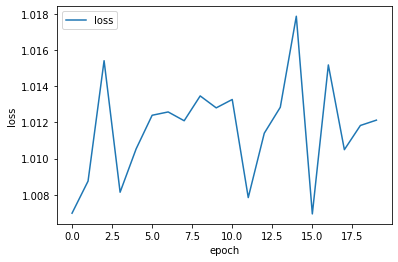

In [29]:
import matplotlib.pyplot as plt

for training_key in train_history.history.keys():
    plt.plot(train_history.history[training_key], label = training_key)
    plt.ylabel(training_key)
    plt.xlabel('epoch')
    plt.legend([training_key], loc='upper left')
    plt.show()

# 進行預測

In [37]:
test_prediction_std = model.predict(test_x_window)

# 還原成y

In [51]:
test_prediction = y_scaler.inverse_transform(test_prediction_std)
test_y_ = y_scaler.inverse_transform(test_y_window)

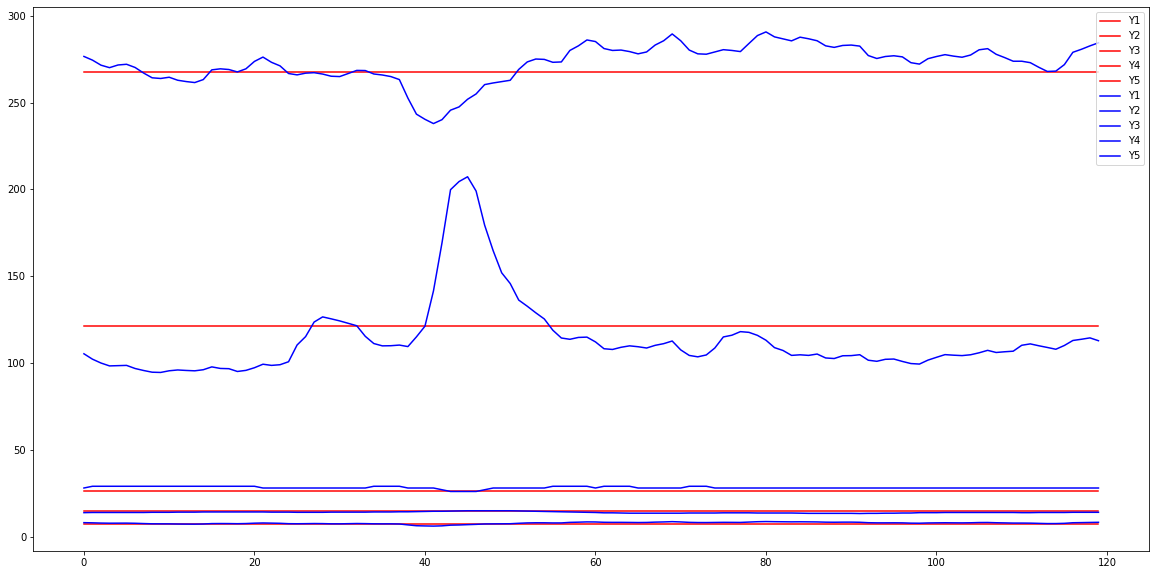

In [66]:
plt.figure(figsize=(20,10))
plt.plot(test_prediction, color = 'red', label = y_column_list) 
plt.plot(test_y_, color = 'b', label = y_column_list) 
# plt.plot(testing_y_date, predicted_stock_price, color = 'blue', label = 'Predicted Stock Price') 
plt.legend()
plt.show()